<a href="https://colab.research.google.com/github/kabir993/kabiropedia/blob/main/lasso_regression_and_ridge_regression_practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset = pd.read_csv("/content/BostonHousing.csv")
dataset.head(4)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4


<Axes: >

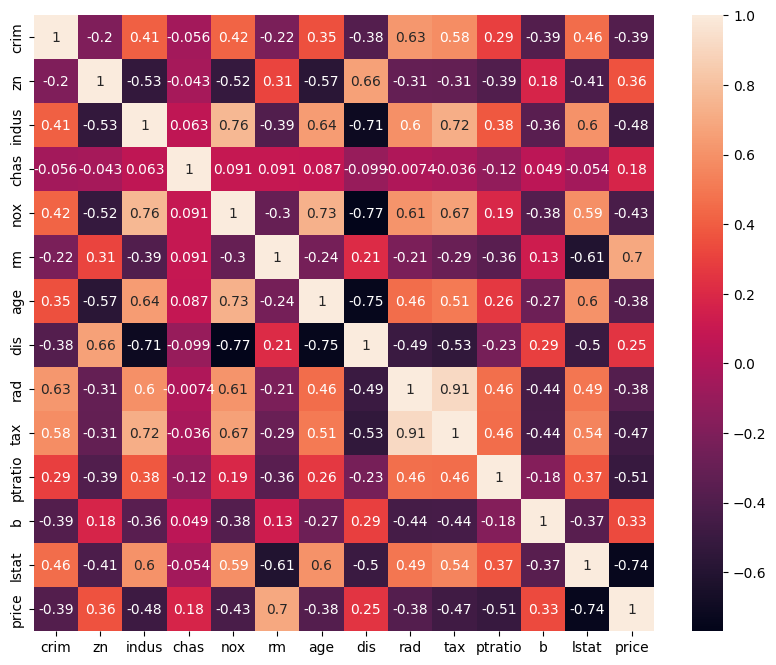

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot=True)

In [ ]:
x=dataset.iloc[:,:-1]
y=dataset["price"]

In [ ]:
sc=StandardScaler()
sc.fit(x)

StandardScaler()

In [ ]:
x = pd.DataFrame(sc.transform(x), columns=x.columns)

In [ ]:
 x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#linear regression

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.668759493535632

In [ ]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))
print(mean_absolute_error(y_test,lr.predict(x_test)))

24.29111947497352
4.928602182665337
3.1890919658878496


In [ ]:
lr.coef_

array([-0.97149423,  0.70155562,  0.27675212,  0.70653152, -1.99143043,
        3.11571836, -0.17706021, -3.04577065,  2.28278471, -1.79260468,
       -1.97995351,  1.12649864, -3.62814937])

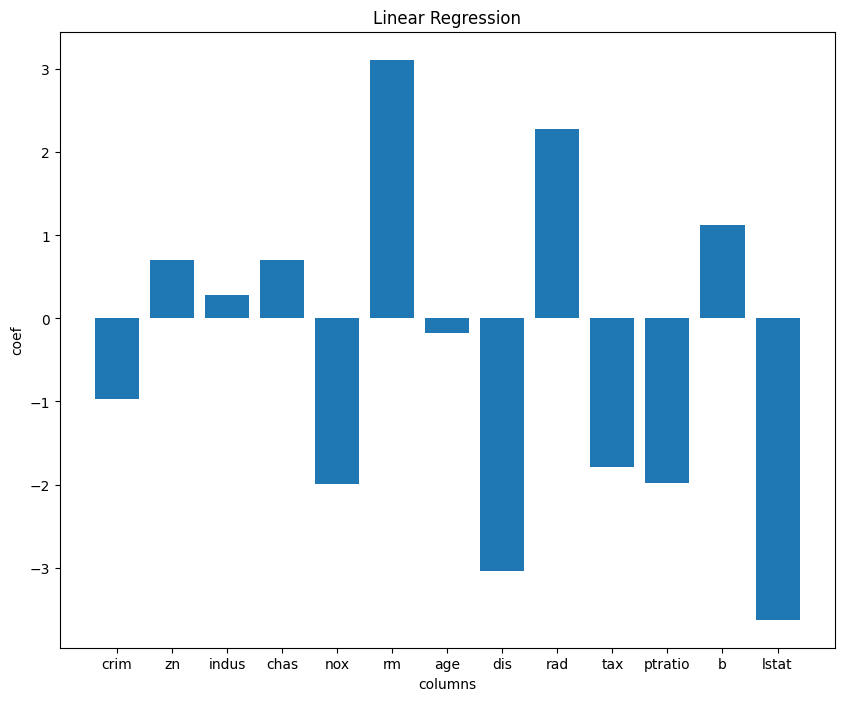

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(x.columns,lr.coef_)
plt.title("Linear Regression")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

#lasso

In [ ]:
la=Lasso(alpha=1)
la.fit(x_train,y_train)
la.score(x_test,y_test)

0.6242880038311522

In [ ]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))
print(mean_absolute_error(y_test,la.predict(x_test)))

27.552382057778367
5.249036298005413
3.464849520571196


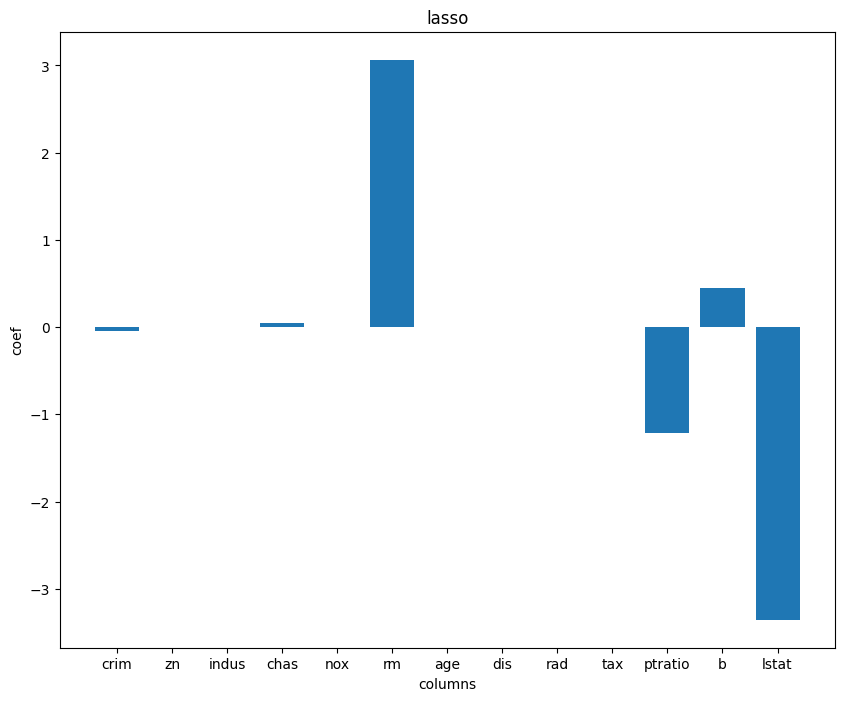

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(x.columns,la.coef_)
plt.title("lasso")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

#ridge

In [ ]:
ri=Ridge(alpha=1)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)

0.6684401592810276

In [ ]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))
print(mean_absolute_error(y_test,ri.predict(x_test)))

24.31453746395633
4.930977333547208
3.1859034992980253


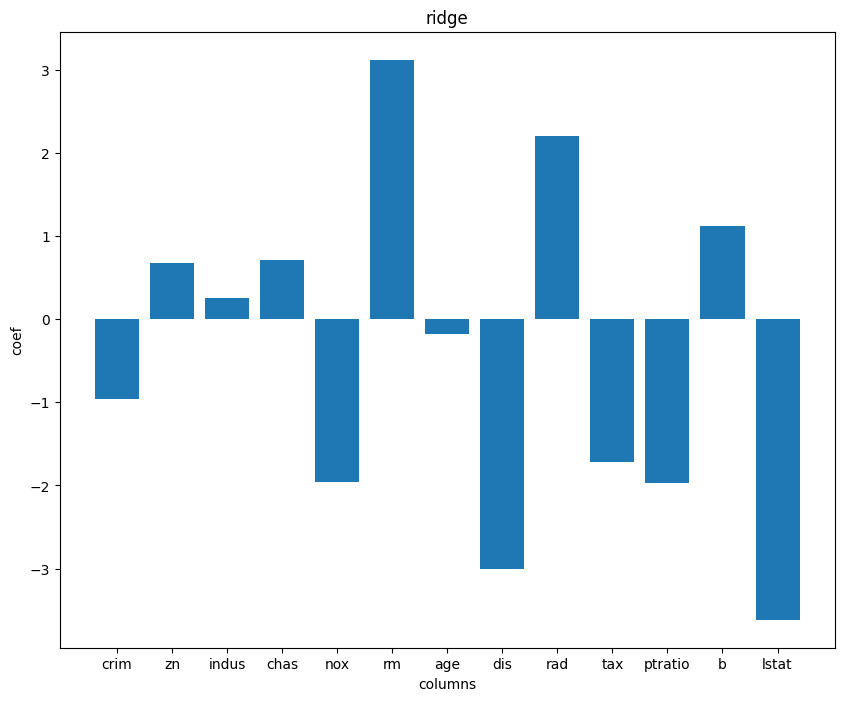

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(x.columns,ri.coef_)
plt.title("ridge")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

In [ ]:
df=pd.DataFrame({"col_name":x.columns,"LinearRegression":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})
df

,col_name,LinearRegression,Lasso,Ridge
0,crim,-0.971494,-0.047615,-0.962034
1,zn,0.701556,0.000000,0.682559
2,indus,0.276752,-0.000000,0.250716
3,chas,0.706532,0.051141,0.710338
4,nox,-1.991430,-0.000000,-1.961573
5,rm,3.115718,3.065898,3.122321
6,age,-0.177060,-0.000000,-0.178459
7,dis,-3.045771,-0.000000,-3.010025
8,rad,2.282785,-0.000000,2.201956
9,tax,-1.792605,-0.000000,-1.717846
